In [588]:
import numpy as np
import pandas as pd
import math
from timeit import default_timer as timer
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [589]:
#assigning the training and test variables to variables
full_training = pd.read_csv(r'C:\Users\tonyr\PycharmProjects\CSCE5210\train.csv')
full_test = pd.read_csv(r'C:\Users\tonyr\PycharmProjects\CSCE5210\Test.csv')


In [590]:
full_test

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [591]:
full_training

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked


In [592]:
full_training.shape

(1549, 7)

In [593]:
full_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [594]:
#droping any duplicates from the training data
full_training.drop_duplicates(subset = ['Patient', 'Weeks'], keep = False, inplace = True )
full_training.shape

(1535, 7)

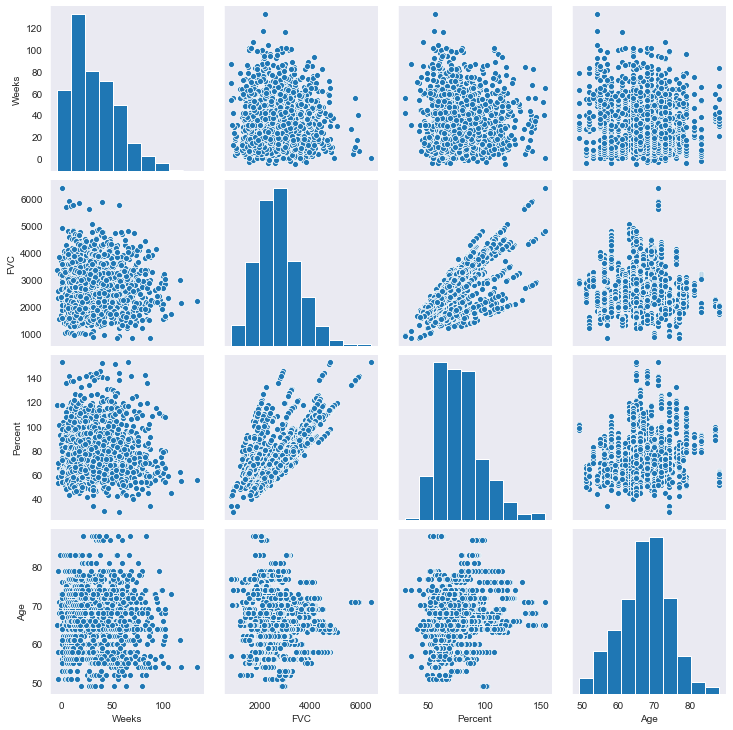

In [595]:
sns.pairplot(full_training)

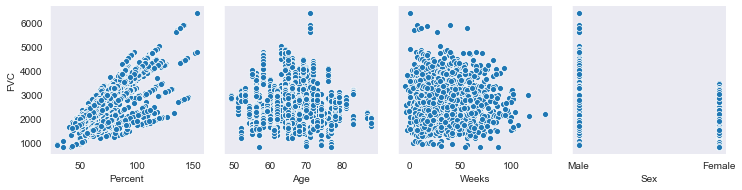

In [596]:
sns.pairplot(full_training, x_vars=['Percent','Age','Weeks','Sex'], y_vars='FVC')

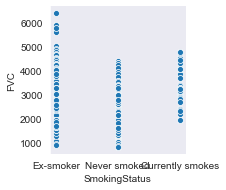

In [597]:
sns.pairplot(full_training, x_vars=['SmokingStatus'], y_vars='FVC')

In [598]:
#Labeling datasets
full_training['Dataset'] = 'train'
full_test['Dataset'] = 'test'

In [599]:
#Merge datasets
datasets = full_training.append([full_test])
datasets = datasets.reset_index()
datasets = datasets.drop(columns=['index'])
datasets

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,Dataset
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker,train
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker,train
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker,train
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker,train
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker,train
...,...,...,...,...,...,...,...,...
1535,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker,test
1536,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker,test
1537,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker,test
1538,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker,test


In [600]:
#Conversion of categorical values into numeric ones
datasets = pd.concat([
    datasets,
    pd.get_dummies(datasets.Sex),
    pd.get_dummies(datasets.SmokingStatus)
], axis=1)
datasets = datasets.drop(columns=['Sex','SmokingStatus'])
datasets

,Patient,Weeks,FVC,Percent,Age,Dataset,Female,Male,Currently smokes,Ex-smoker,Never smoked
0,ID00007637202177411956430,-4,2315,58.253649,79,train,0,1,0,1,0
1,ID00007637202177411956430,5,2214,55.712129,79,train,0,1,0,1,0
2,ID00007637202177411956430,7,2061,51.862104,79,train,0,1,0,1,0
3,ID00007637202177411956430,9,2144,53.950679,79,train,0,1,0,1,0
4,ID00007637202177411956430,11,2069,52.063412,79,train,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1535,ID00419637202311204720264,6,3020,70.186855,73,test,0,1,0,1,0
1536,ID00421637202311550012437,15,2739,82.045291,68,test,0,1,0,1,0
1537,ID00422637202311677017371,6,1930,76.672493,73,test,0,1,0,1,0
1538,ID00423637202312137826377,17,3294,79.258903,72,test,0,1,0,1,0


In [601]:
#scaling data to a range from 0 to 1
def scaling(series):
    return (series - series.min()) / (series.max() - series.min())

datasets['Weeks'] = scaling(datasets['Weeks'])
datasets['Percent'] = scaling(datasets['Percent'])
datasets['Age'] = scaling(datasets['Age'])
datasets

,Patient,Weeks,FVC,Percent,Age,Dataset,Female,Male,Currently smokes,Ex-smoker,Never smoked
0,ID00007637202177411956430,0.007246,2315,0.236393,0.769231,train,0,1,0,1,0
1,ID00007637202177411956430,0.072464,2214,0.215941,0.769231,train,0,1,0,1,0
2,ID00007637202177411956430,0.086957,2061,0.184960,0.769231,train,0,1,0,1,0
3,ID00007637202177411956430,0.101449,2144,0.201767,0.769231,train,0,1,0,1,0
4,ID00007637202177411956430,0.115942,2069,0.186580,0.769231,train,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1535,ID00419637202311204720264,0.079710,3020,0.332421,0.615385,test,0,1,0,1,0
1536,ID00421637202311550012437,0.144928,2739,0.427848,0.487179,test,0,1,0,1,0
1537,ID00422637202311677017371,0.079710,1930,0.384612,0.615385,test,0,1,0,1,0
1538,ID00423637202312137826377,0.159420,3294,0.405425,0.589744,test,0,1,0,1,0


In [602]:
#Separating the datasets
full_training = datasets.loc[datasets.Dataset == 'train']
full_test = datasets.loc[datasets.Dataset == 'test']

In [603]:
full_test = full_test.drop(columns=['Dataset'])
full_test

,Patient,Weeks,FVC,Percent,Age,Female,Male,Currently smokes,Ex-smoker,Never smoked
1535,ID00419637202311204720264,0.079710,3020,0.332421,0.615385,0,1,0,1,0
1536,ID00421637202311550012437,0.144928,2739,0.427848,0.487179,0,1,0,1,0
1537,ID00422637202311677017371,0.079710,1930,0.384612,0.615385,0,1,0,1,0
1538,ID00423637202312137826377,0.159420,3294,0.405425,0.589744,0,1,0,1,0
1539,ID00426637202313170790466,0.036232,2925,0.345604,0.615385,0,1,0,0,1


In [604]:
full_training = full_training.drop(columns=['Dataset'])
full_training

,Patient,Weeks,FVC,Percent,Age,Female,Male,Currently smokes,Ex-smoker,Never smoked
0,ID00007637202177411956430,0.007246,2315,0.236393,0.769231,0,1,0,1,0
1,ID00007637202177411956430,0.072464,2214,0.215941,0.769231,0,1,0,1,0
2,ID00007637202177411956430,0.086957,2061,0.184960,0.769231,0,1,0,1,0
3,ID00007637202177411956430,0.101449,2144,0.201767,0.769231,0,1,0,1,0
4,ID00007637202177411956430,0.115942,2069,0.186580,0.769231,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1530,ID00426637202313170790466,0.130435,2712,0.303514,0.615385,0,1,0,0,1
1531,ID00426637202313170790466,0.173913,2978,0.356076,0.615385,0,1,0,0,1
1532,ID00426637202313170790466,0.260870,2908,0.342244,0.615385,0,1,0,0,1
1533,ID00426637202313170790466,0.347826,2975,0.355484,0.615385,0,1,0,0,1


In [605]:
#Creating a validation dataset from the training set
training, validation = train_test_split(full_training, test_size = .2, random_state = 42)
training = full_training

In [606]:
validation

,Patient,Weeks,FVC,Percent,Age,Female,Male,Currently smokes,Ex-smoker,Never smoked
1159,ID00323637202285211956970,0.246377,1550,0.290116,0.717949,0,1,0,1,0
76,ID00020637202178344345685,0.260870,2115,0.640244,0.435897,1,0,0,0,1
316,ID00090637202204766623410,0.565217,2907,0.391898,0.512821,0,1,0,1,0
1040,ID00288637202279148973731,0.282609,2365,0.426512,0.358974,1,0,0,1,0
1357,ID00376637202297677828573,0.594203,4251,0.723159,0.589744,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1182,ID00331637202286306023714,0.630435,3221,0.550127,0.512821,0,1,1,0,0
846,ID00224637202259281193413,0.318841,2656,0.224858,0.589744,0,1,0,0,1
1517,ID00423637202312137826377,0.159420,3294,0.405425,0.589744,0,1,0,1,0
233,ID00072637202198161894406,0.181159,2376,0.354049,0.564103,0,1,0,1,0


In [607]:
#Defining the training targets
training_targets = training['FVC']
training_targets

0       2315
1       2214
2       2061
3       2144
4       2069
        ... 
1530    2712
1531    2978
1532    2908
1533    2975
1534    2774
Name: FVC, Length: 1535, dtype: int64

In [608]:
training = training.drop(columns=['Patient','FVC'])
training

,Weeks,Percent,Age,Female,Male,Currently smokes,Ex-smoker,Never smoked
0,0.007246,0.236393,0.769231,0,1,0,1,0
1,0.072464,0.215941,0.769231,0,1,0,1,0
2,0.086957,0.184960,0.769231,0,1,0,1,0
3,0.101449,0.201767,0.769231,0,1,0,1,0
4,0.115942,0.186580,0.769231,0,1,0,1,0
...,...,...,...,...,...,...,...,...
1530,0.130435,0.303514,0.615385,0,1,0,0,1
1531,0.173913,0.356076,0.615385,0,1,0,0,1
1532,0.260870,0.342244,0.615385,0,1,0,0,1
1533,0.347826,0.355484,0.615385,0,1,0,0,1


In [609]:
#Initiate and train the model
cv = KFold(n_splits=200, random_state = 42, shuffle = True)

LinReg = HuberRegressor(max_iter=200)
LinReg.fit(training,training_targets)

HuberRegressor(max_iter=200)

In [610]:
#R squared values
scores = cross_val_score(LinReg, training, training_targets, cv = cv)
scores

array([ 0.77643419,  0.64052739,  0.89687868,  0.86342473,  0.67858098,
       -0.4980259 ,  0.62331636,  0.63974105,  0.95934011,  0.65817791,
        0.6593654 ,  0.8928429 ,  0.76525074,  0.96252088,  0.85055009,
        0.82116296,  0.80731701,  0.9301369 ,  0.71621202,  0.78192897,
        0.93206883,  0.89927563,  0.84368962,  0.0222078 ,  0.92512534,
        0.92612375,  0.53793717,  0.90838216,  0.95002617,  0.69093348,
        0.7251405 ,  0.84565004,  0.85797847,  0.93113093,  0.87851452,
        0.7600621 ,  0.04065379,  0.64926328,  0.30807055,  0.52304317,
        0.93335937,  0.67437153,  0.77148477,  0.08207988,  0.9154439 ,
        0.93708979,  0.65699606,  0.867002  ,  0.40690798,  0.91657012,
        0.03806168,  0.75929213,  0.71267284,  0.88762239,  0.87214194,
        0.80258989,  0.7455369 ,  0.89593567,  0.80928046,  0.80007943,
        0.74873534,  0.90065403,  0.73610878,  0.79391691,  0.86587501,
        0.91798415,  0.9406306 ,  0.89657176,  0.90460644,  0.78

In [611]:
#R squared value
rsc = LinReg.score(training, training_targets)
rsc

0.8312469624713887

In [612]:
#Predict values
pred = cross_val_predict(LinReg, training, training_targets, cv = 200)
pred = LinReg.predict(training)
pred

array([2083.61009484, 1997.04817823, 1870.24630907, ..., 2652.59616039,
       2702.00141406, 2534.44676651])

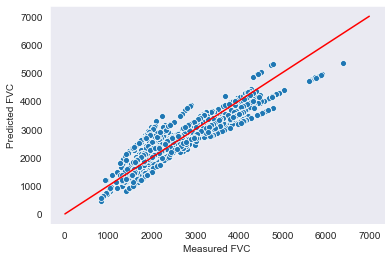

In [613]:
sns.set_style('dark')

plot = sns.scatterplot(training_targets, pred)
plot.set(xlabel = 'Measured FVC', ylabel = 'Predicted FVC')

x_plot = np.linspace(0,7000,1000)
y_plot = x_plot
plt.plot(x_plot, y_plot, color ='r')

In [614]:
#Training Evaluation
mse = mean_squared_error(training_targets, pred, squared = True)
mse = math.sqrt(mse)
print(mse)
mae = mean_absolute_error(training_targets, pred)
print(mae)

342.9480846261719
258.127823964242


In [615]:
validation_targets = validation['FVC']
validation_targets

1159    1550
76      2115
316     2907
1040    2365
1357    4251
        ... 
1182    3221
846     2656
1517    3294
233     2376
976     2021
Name: FVC, Length: 307, dtype: int64

In [616]:
validation = validation.drop(columns=['Patient','FVC'])
validation

,Weeks,Percent,Age,Female,Male,Currently smokes,Ex-smoker,Never smoked
1159,0.246377,0.290116,0.717949,0,1,0,1,0
76,0.260870,0.640244,0.435897,1,0,0,0,1
316,0.565217,0.391898,0.512821,0,1,0,1,0
1040,0.282609,0.426512,0.358974,1,0,0,1,0
1357,0.594203,0.723159,0.589744,0,1,0,0,1
...,...,...,...,...,...,...,...,...
1182,0.630435,0.550127,0.512821,0,1,1,0,0
846,0.318841,0.224858,0.589744,0,1,0,0,1
1517,0.159420,0.405425,0.589744,0,1,0,1,0
233,0.181159,0.354049,0.564103,0,1,0,1,0


In [617]:
LinReg.score(validation, validation_targets)

0.8437676160339772

In [618]:
pred_validation = LinReg.predict(validation)
pred_validation

array([2327.46114898, 2850.02948264, 2875.38216026, 1996.88546881,
       4204.12308906, 1678.1329239 , 3437.89912264, 3170.82558534,
       1419.68586626, 2714.82509232, 2798.90795941, 3040.77750756,
       2241.2472133 , 3103.12882041, 2139.30006842, 2501.70617493,
       3063.49160443, 3266.46524152, 3513.27860259, 2677.59703921,
       3468.53204688, 2626.18661392, 4380.83486048, 2034.32060657,
       2340.61550462, 1502.90203187, 2155.22097981, 2339.57075753,
       1795.55059857, 2990.35737058, 3676.2858079 , 3446.45384035,
       3744.03774816, 3288.39067964, 3147.4459531 , 3339.77169021,
       3663.10157316, 2818.73829159, 2496.07107777, 2451.36277927,
       2676.73611438, 2830.72575333, 2420.87679223, 2382.49747501,
       2542.50815512, 2516.92295959, 2593.02659953, 3135.3120909 ,
       3156.58616105,  957.2735593 , 2377.11219   , 2124.55890926,
       1752.85966948, 2272.71247693, 2714.70626842, 1440.19804449,
       3092.11708826, 3061.99262568, 2942.44925755, 3378.41515

In [619]:
#Training Evaluation
mse = mean_squared_error(validation_targets, pred_validation, squared = True)
mse = math.sqrt(mse)
print(mse)
mae = mean_absolute_error(validation_targets, pred_validation)
print(mae)

333.42535588120285
248.8731375063051


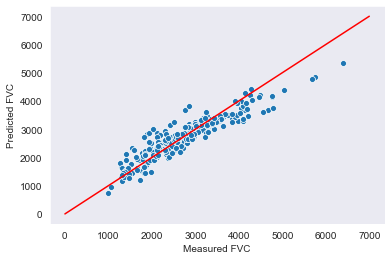

In [620]:
sns.set_style('dark')

plot = sns.scatterplot(validation_targets, pred_validation)
plot.set(xlabel = 'Measured FVC', ylabel = 'Predicted FVC')

x_plot = np.linspace(0,7000,1000)
y_plot = x_plot
plt.plot(x_plot, y_plot, color ='r')

In [621]:
test_targets = full_test['FVC']
test_targets

1535    3020
1536    2739
1537    1930
1538    3294
1539    2925
Name: FVC, dtype: int64

In [622]:
female = [0,0,0,0,0]
full_test['Female'] = female
full_test

,Patient,Weeks,FVC,Percent,Age,Female,Male,Currently smokes,Ex-smoker,Never smoked
1535,ID00419637202311204720264,0.079710,3020,0.332421,0.615385,0,1,0,1,0
1536,ID00421637202311550012437,0.144928,2739,0.427848,0.487179,0,1,0,1,0
1537,ID00422637202311677017371,0.079710,1930,0.384612,0.615385,0,1,0,1,0
1538,ID00423637202312137826377,0.159420,3294,0.405425,0.589744,0,1,0,1,0
1539,ID00426637202313170790466,0.036232,2925,0.345604,0.615385,0,1,0,0,1


In [623]:
test=full_test.drop(columns=['Patient','FVC'])
test

,Weeks,Percent,Age,Female,Male,Currently smokes,Ex-smoker,Never smoked
1535,0.079710,0.332421,0.615385,0,1,0,1,0
1536,0.144928,0.427848,0.487179,0,1,0,1,0
1537,0.079710,0.384612,0.615385,0,1,0,1,0
1538,0.159420,0.405425,0.589744,0,1,0,1,0
1539,0.036232,0.345604,0.615385,0,1,0,0,1


In [624]:
LinReg.score(test, test_targets)

-0.18528101819113685

In [625]:
pred_test = LinReg.predict(test)
pred_test

array([2583.22399497, 3061.99262568, 2795.57767302, 2894.94037252,
       2677.79313068])

In [626]:
#Training Evaluation
mse = mean_squared_error(test_targets, pred_test, squared = True)
mse = math.sqrt(mse)
print(mse)
mae = mean_absolute_error(test_targets, pred_test)
print(mae)

502.9278368463902
454.3225601079309


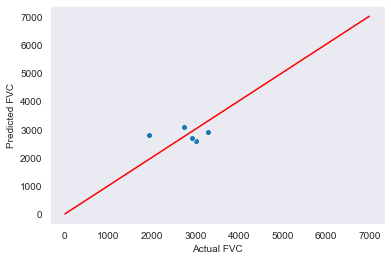

In [627]:
sns.set_style('dark')

plot = sns.scatterplot(test_targets, pred_test)
plot.set(xlabel = 'Actual FVC', ylabel = 'Predicted FVC')

x_plot = np.linspace(0,7000,1000)
y_plot = x_plot
plt.plot(x_plot, y_plot, color ='r')